AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 7.6 		 0.77 		 0.81 |
| 1.1 		 0.72 		 0.28 |
| 6.9 		 0.54 		 0.64 |
| 6.1 		 0.14 		 0.55 |
| 6.4 		 0.84 		 0.43 |
| 8.6 		 0.66 		 0.67 |
| 3.5 		 0.14 		 0.12 |
| 8.6 		 0.23 		 0.08 |
| 2.6 		 0.99 		 0.65 |
| 9.6 		 0.38 		 0.88 |
| 8.7 		 0.43 		 0.61 |
| 5.5 		 0.46 		 0.37 |
| 0.1 		 0.25 		 0.7 |
| 6.6 		 0.25 		 0.85 |
| 4.7 		 0.61 		 0.58 |
| 6.3 		 0.68 		 0.56 |
| 8.3 		 0.75 		 0.11 |
| 1.7 		 0.32 		 0.74 |
| 2.2 		 0.65 		 0.11 |
-------------------------------------
The s.d. of M is: 2.91
The s.d. of D is: 0.28
The s.d. of R is: 0.26
-------------------------------------
The mean of M is: 5.01
The mean of D is: 0.46
The mean of R is: 0.51
-------------------------------------


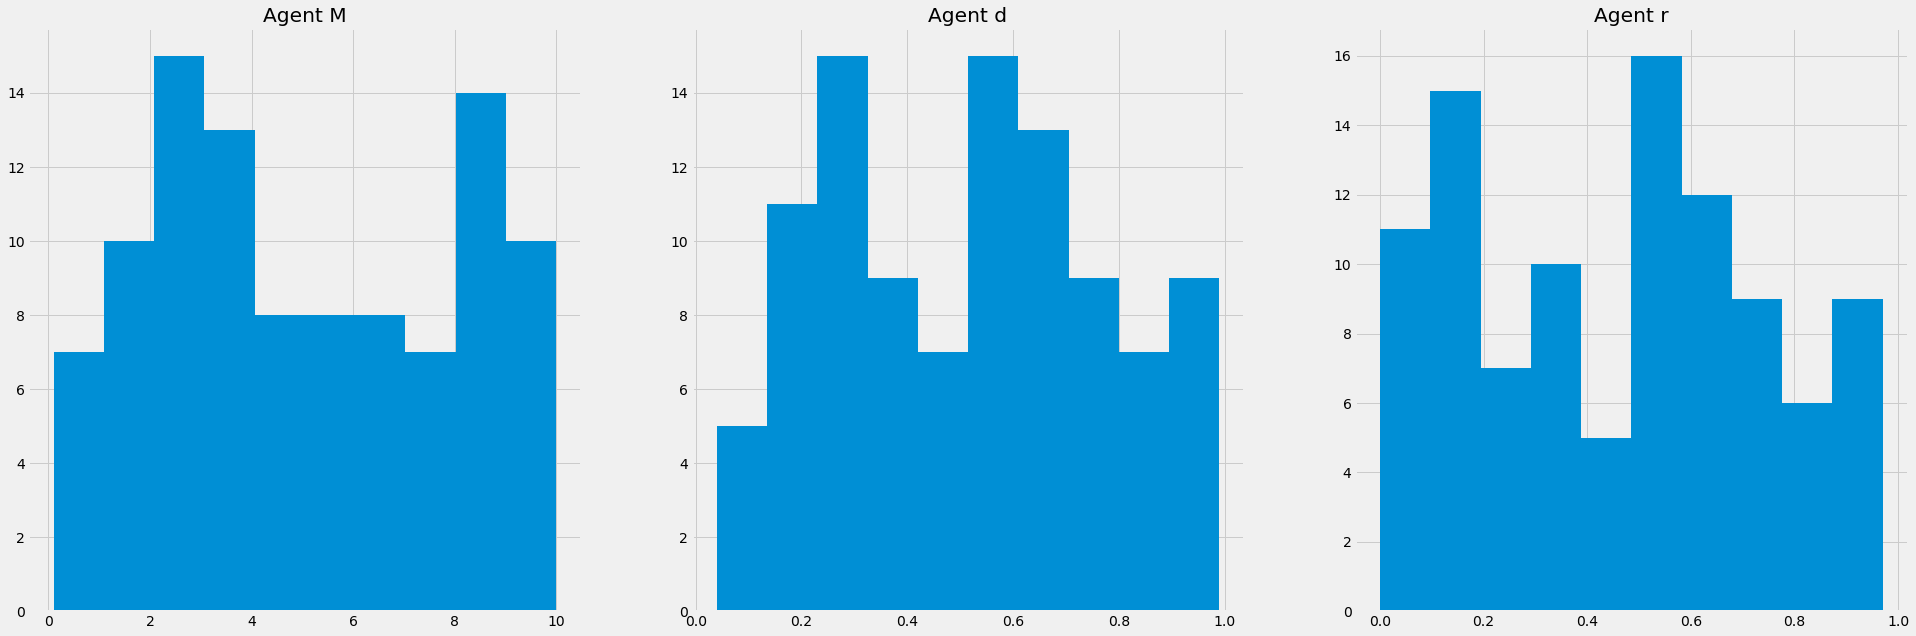

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 1.7, Temptation: 2.6, Sucker: 0, Punishment: 0.9
Agent 1 playing Agent 0: Reward: 7.6, Temptation: 9.7, Sucker: 0, Punishment: 2.1
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 10.9, Temptation: 16.5, Sucker: 0, Punishment: 5.6
Agent 2 playing Agent 0: Reward: 9.0, Temptation: 13.8, Sucker: 0, Punishment: 4.9
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 9.6, Temptation: 14.6, Sucker: 0, Punishment: 4.9
Agent 3 playing Agent 0: Reward: 5.2, Temptation: 9.4, Sucker: 0, Punishment: 4.2
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 10.1, Temptation: 15.3, Sucker: 0, Punishment: 5.2
Agent 4 playing 

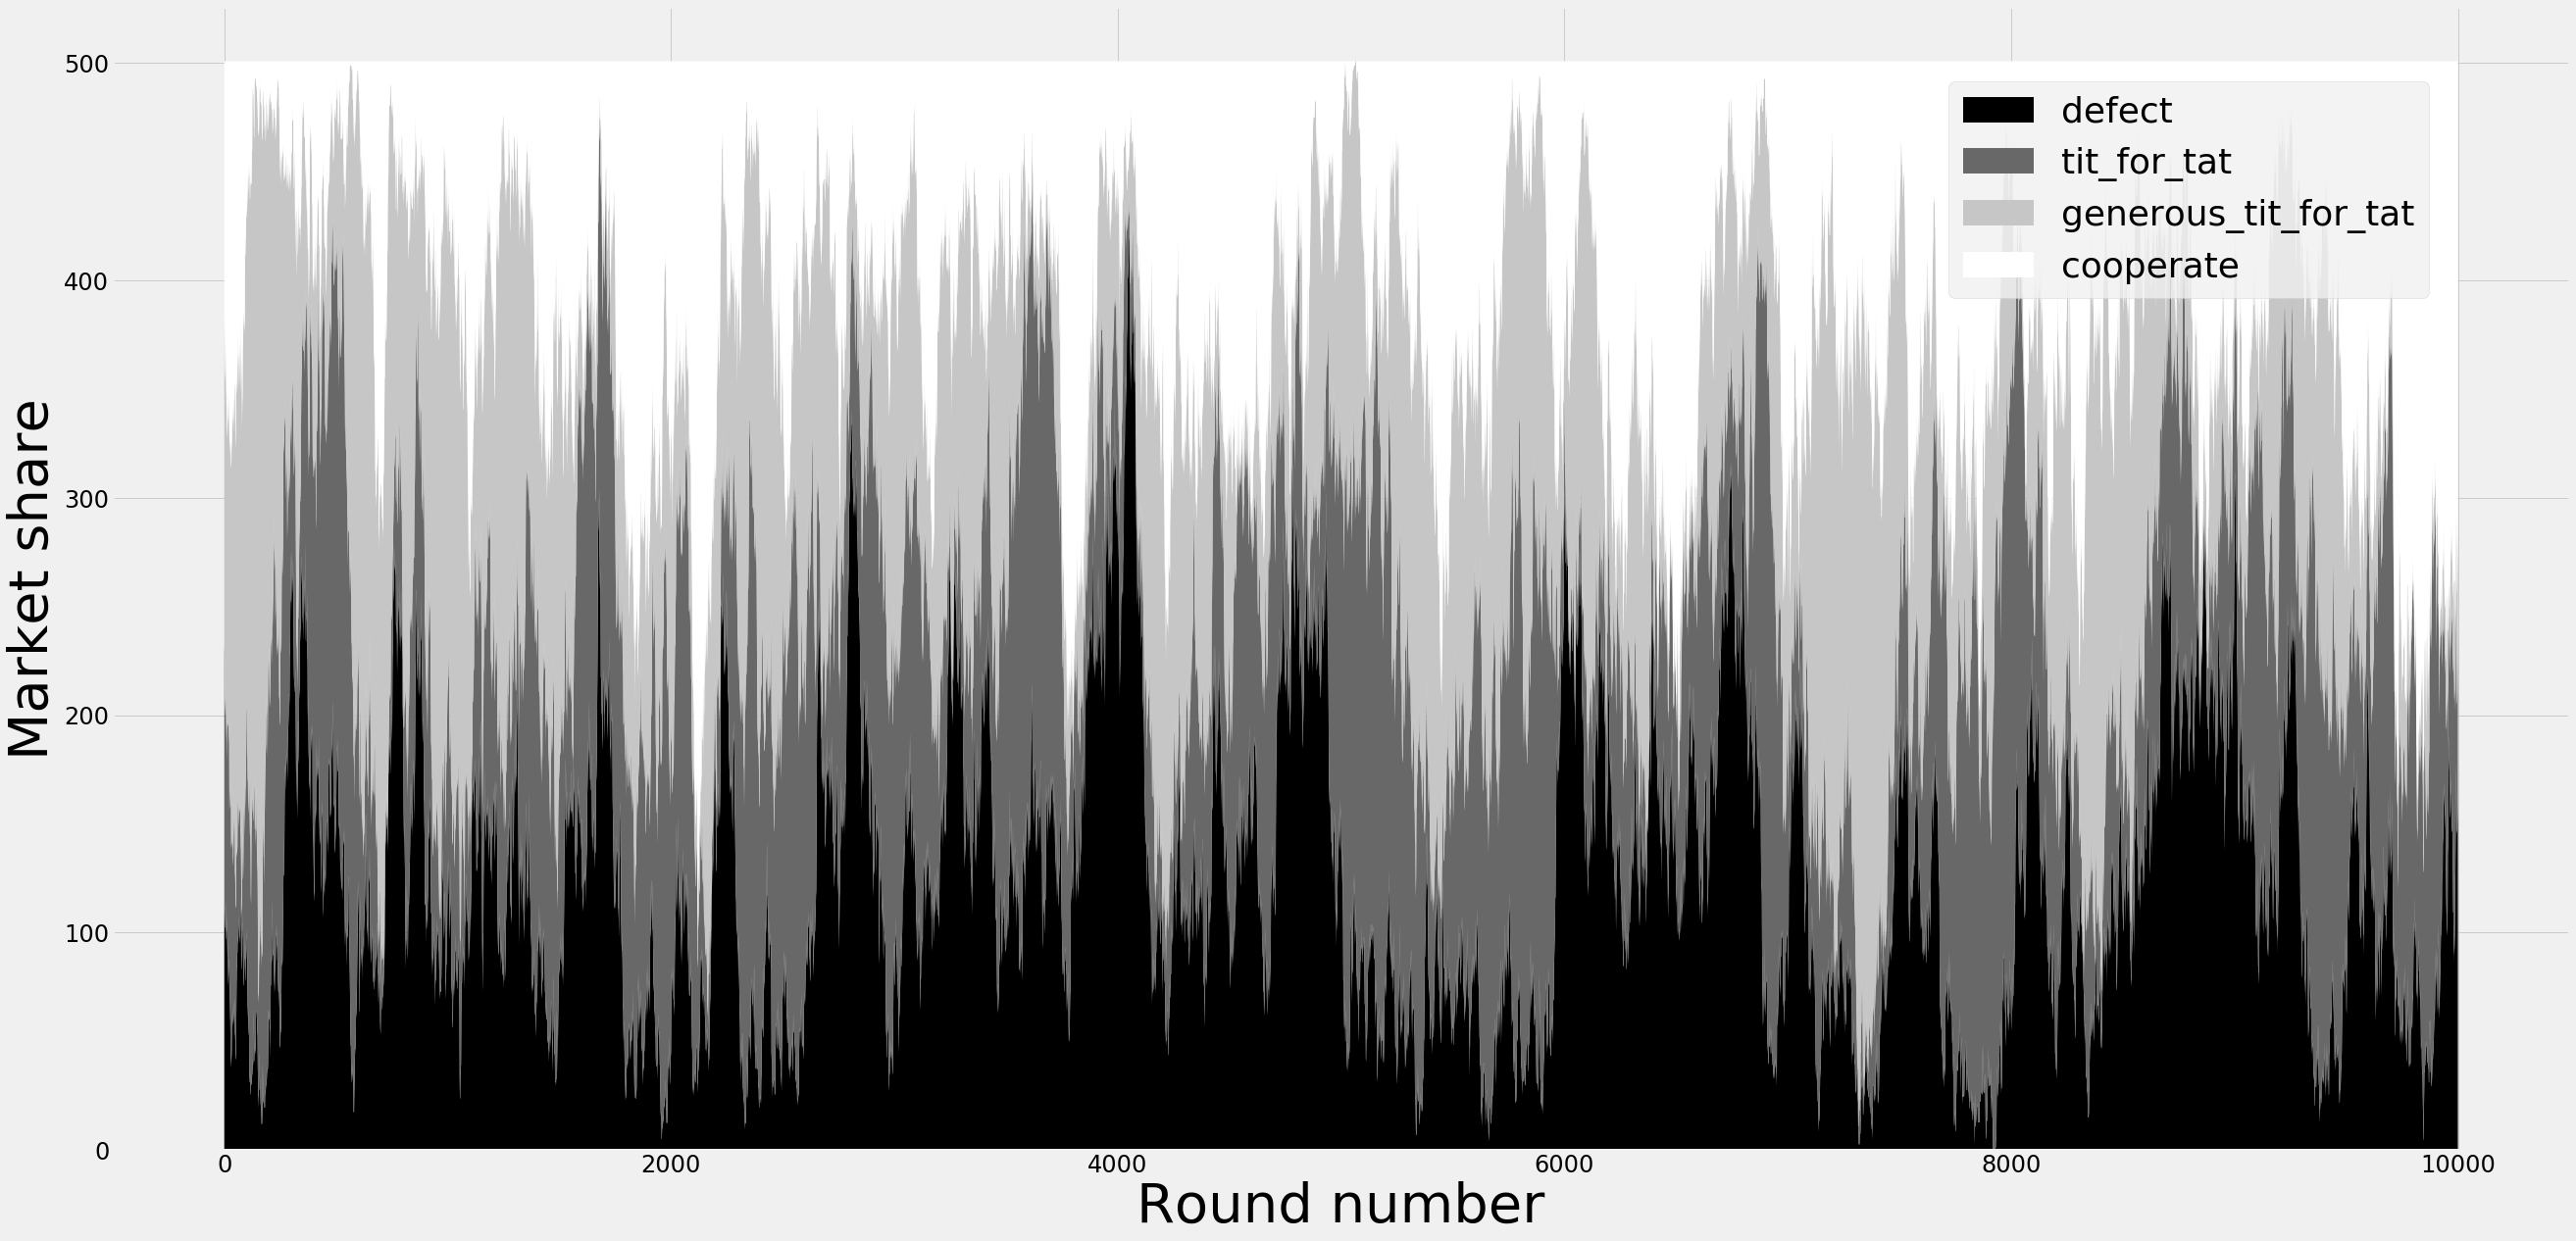

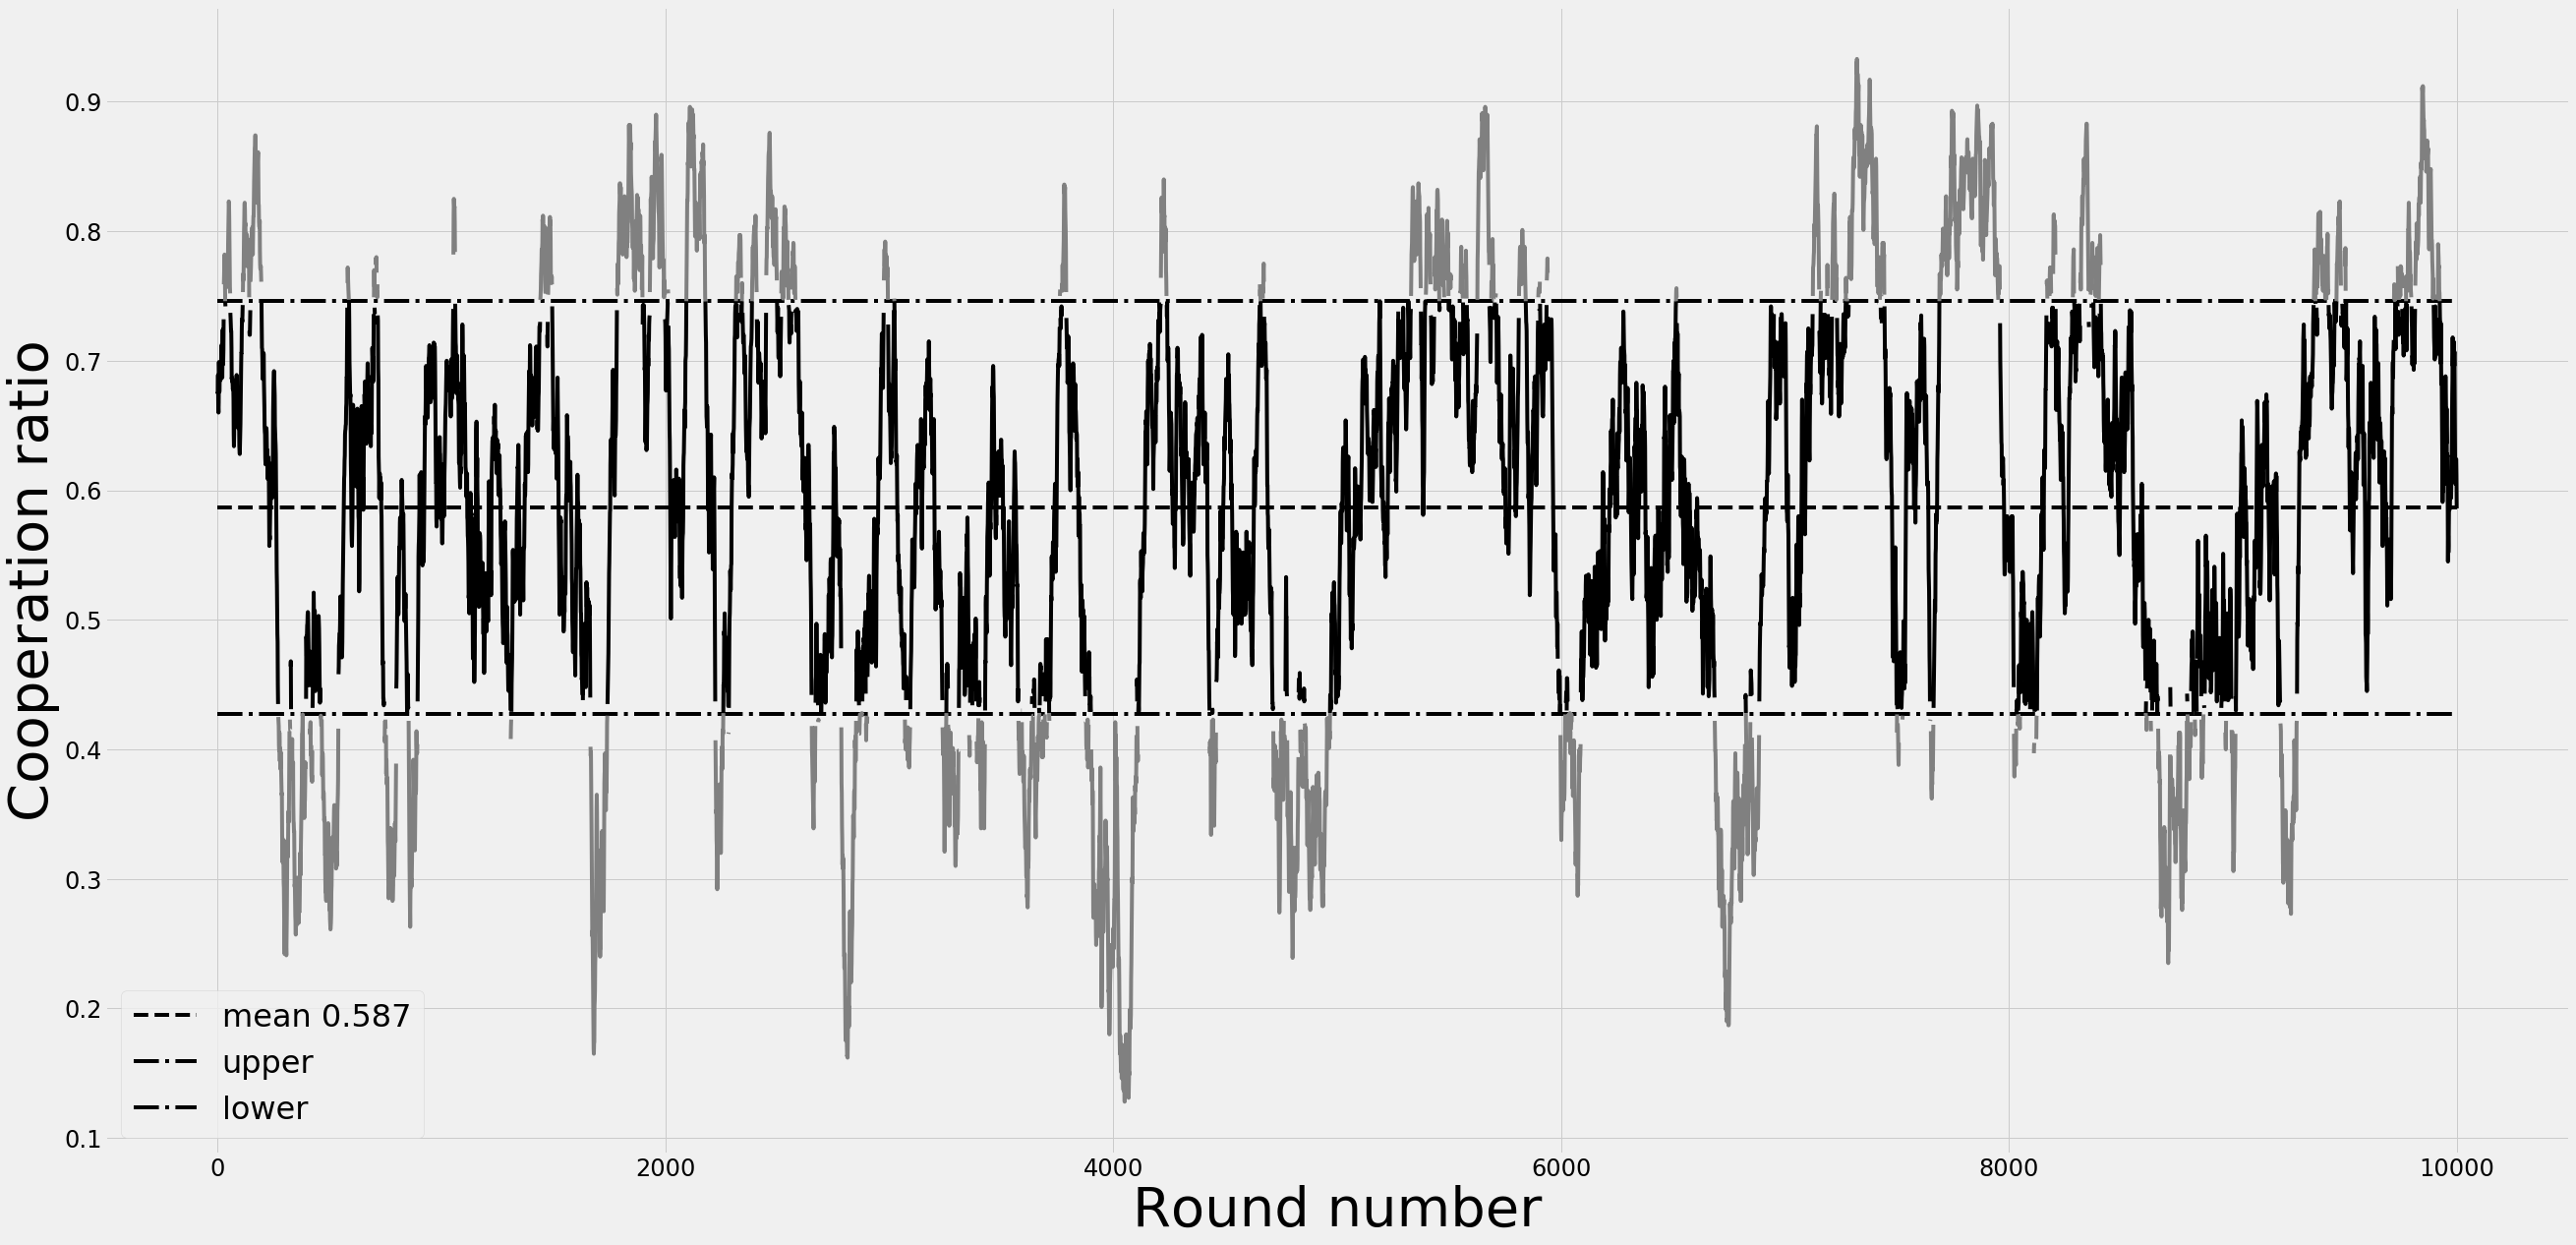

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 8
np.random.seed(seed)

tour_type = "hetero_mdr_sd_max"
M = [5, 12.5]
R = [0.4, 1.25]
D = [0.3, 1.25]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed), tour_type = tour_type)